<font size=7> Curation Figure

# Load data

In [1]:
import pickle
from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, plot_latency_dist_hist, plot_latency_angle_hist, \
                                 plot_cross_sttc_pairs, plot_vector_layout2, plot_vector_layout5, plot_vector_layout1, read_autocurated_data, arrow_check2
from human_hip.animate import animate_latencies

from scipy import stats
from ipywidgets import interact_manual, interact
import matplotlib.pyplot as plt
import numpy as np
from human_hip.spike_data import latencies

from human_hip.spike_data import random_harris


from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, cross_sttc, plot_pair_analysis, plot_cross_sttc_pairs
import pickle
import matplotlib.pyplot as plt
from ipywidgets import interact_manual
import numpy as np
import pickle

In [2]:
sd = read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


In [3]:
# load good_pairs.pkl
latency_ms = 30
with open("hc112823_acid_good_pairs.pkl", "rb") as filename:
    good_pairs = pickle.load(filename)
good_pairs2 = np.array(good_pairs)


# Make Plots

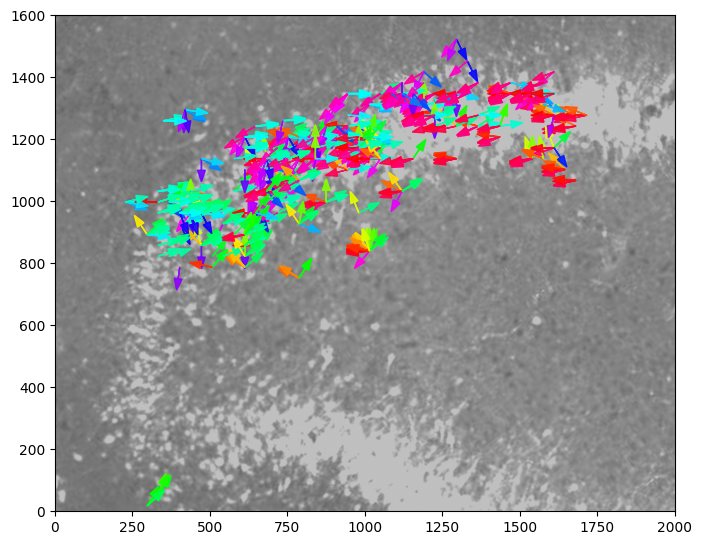

In [4]:
plot_vector_layout1( sd, good_pairs2,  image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png", xlim=(0,2000), ylim=(0,1600) )

Pairs removed by SD cutoff: 0
Total Final Pairs: 192


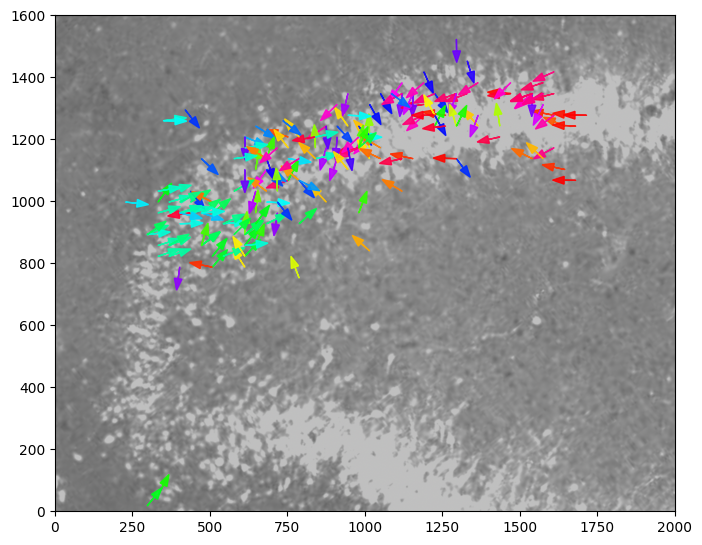

In [5]:
plot_vector_layout5( sd, good_pairs, image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png",
                         figsize=(8, 8), xlim=(0,2000), ylim=(0,1600),
                         sd_cuttoff=50 , latency_ms=30)

Pairs removed by SD cutoff: 101
Total Final Pairs: 91


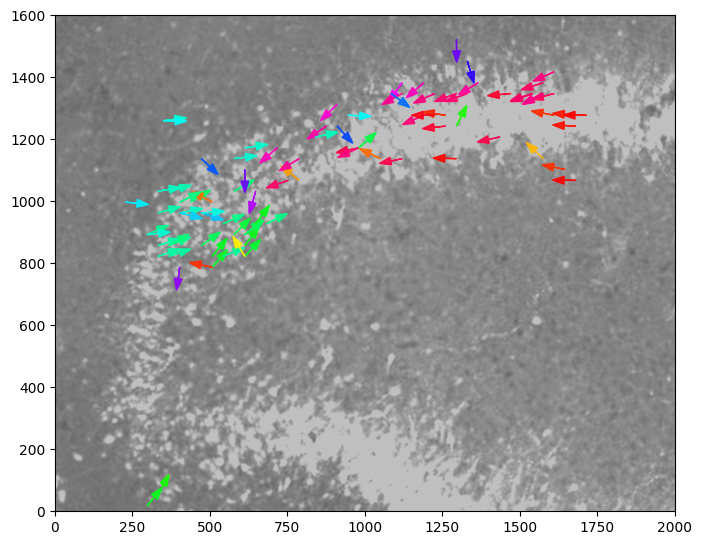

In [26]:
plot_vector_layout5( sd, good_pairs, image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png",
                         figsize=(8, 8), xlim=(0,2000), ylim=(0,1600),
                         sd_cuttoff=.5 , latency_ms=30)

# Look at pairs

set parameters and import packages thtat are run in function

In [4]:
from matplotlib import pyplot as plt
from matplotlib.patches import FancyArrow
from sklearn import preprocessing
import numpy as np
from human_hip.spike_data import latencies, latency_times, plot_raster, plot_footprint, cross_sttc
from braingeneers.analysis.analysis import SpikeData
import warnings
import diptest 
import math
import matplotlib.cm as cm
from ipywidgets import interact
from matplotlib.ticker import MaxNLocator
import numpy as np

In [5]:
pairs= good_pairs
image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png"
xlim=(0,2000)
ylim=(0,1600)
figsize=(8, 8)
sd_cuttoff = 1

run code inside primary function

In [6]:

    # make sure all latencies have positive mean
    # pairs = pairs    # ?avoid bug? 
    # mean_latencies = []
    # for pair in good_pairs:
    #     mean_latency = np.mean( latencies( pair[0], pair[1], sd, ms_cutoff_high=latency_ms)  )
    #     mean_latencies.append(mean_latency)
    # print("all final pairs positive?:", np.all( np.array(mean_latencies)>0 ))

In [7]:
# Get the x/y locations of the start and end neurons of each pair
neuron_xy = []
for neuron in sd.neuron_data[0].values():
    neuron_xy.append( [neuron['position'][0], neuron['position'][1]] )
neuron_xy = np.array(neuron_xy)

/tmp/ipykernel_1944/523732153.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


In [8]:
# Latencies count                  
latency_counts = []
for pair in pairs:
    latency_counts.append( len(latency_times( pair[0], pair[1], sd, ms_cutoff_high=latency_ms, positive_only=True )) )

In [9]:
# Creat arrows show angle of information flow from a neuron
starts = neuron_xy[ [pair[0] for pair in pairs] ]  # Get the x/y locations of the start and end neurons of each pair
ends = neuron_xy[ [pair[1] for pair in pairs] ]
centered = ends-starts   # Get the directions of arrows, then make of of them the same length
normalized = preprocessing.normalize(centered) #* 75
angles = np.arctan2( normalized[:, 1], normalized[:, 0] ) 

In [10]:
# clump by starting pair angle counted by angle
pair_dict = {}
for i in range(len(pairs)):
    key, value = pairs[i]
    if key in pair_dict:
        pair_dict[key] = pair_dict[key] + [ angles[i] ] * latency_counts[i]
    else:
        pair_dict[key] = [ angles[i] ] * latency_counts[i]


get general idea of sd values

In [11]:
good_pairs2[good_pairs2[:, 0] == 0]

array([[  0,   6],
       [  0,  45],
       [  0,  68],
       [  0, 108],
       [  0, 118],
       [  0, 180],
       [  0, 201],
       [  0, 209]])

In [12]:
def rotate_angles( angles, add=1):
    adjusted_angles = []
    for num in angles:
        num += add         # Add 1 to the number
        adjusted_num = ((num + math.pi) % (2 * math.pi)) - math.pi  # modulo operation to wrap within -pi to pi
        adjusted_angles.append(adjusted_num)
    return adjusted_angles

def rotated_sd( angles ):
    sds = []
    for i in range(-3,3): #[-3,1]
        sds.append( np.std( rotate_angles(angles, add=i), ddof=1) )
    return min(sds)

SD: 1.1189844075537283
Rotated SD: 1.119532257969686
Pairs removed by SD cutoff: 0
Total Final Pairs: 1
Pairs removed by SD cutoff: 1
Total Final Pairs: 0


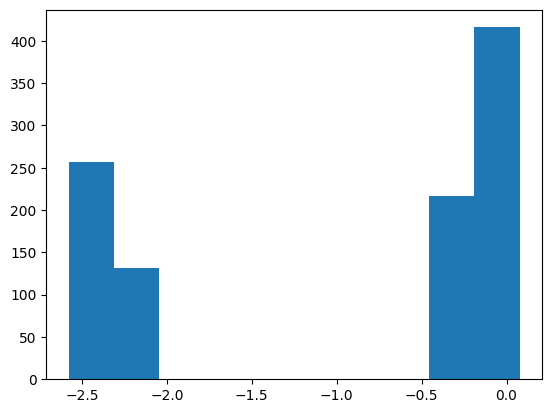

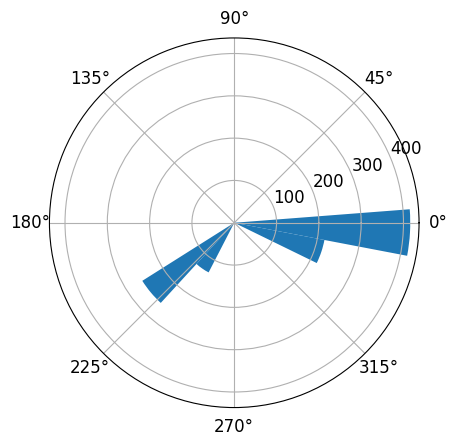

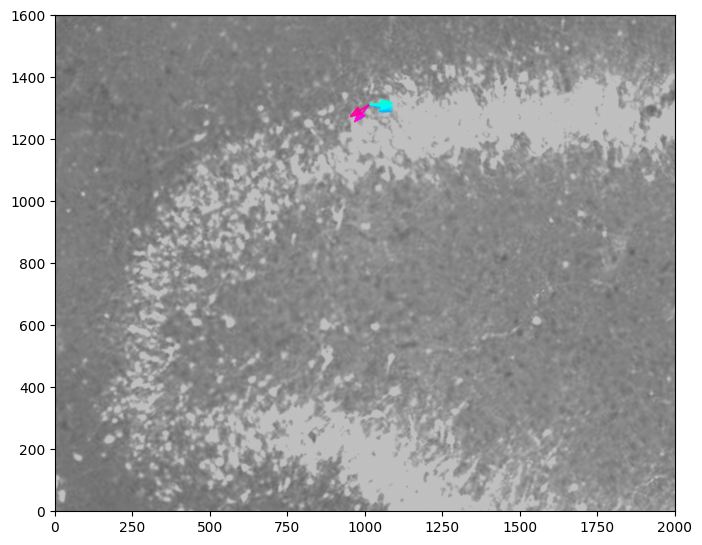

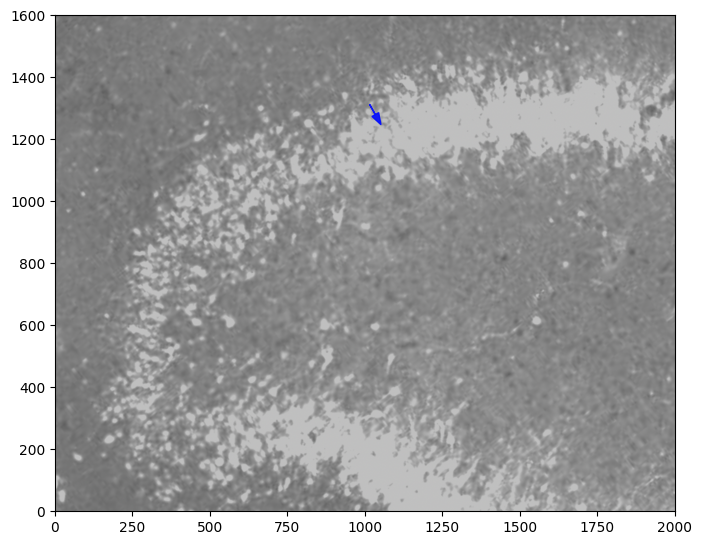

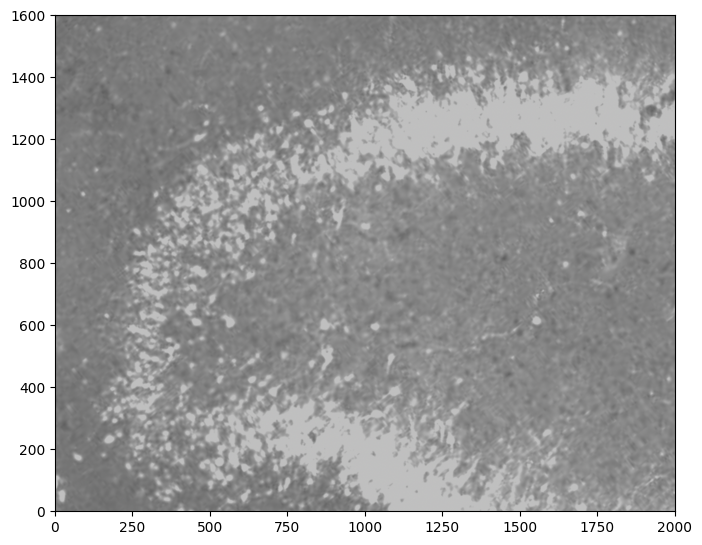

In [13]:
num=16

key = list(pair_dict.keys())[num]
print("SD:", np.std( pair_dict[key] ))
print("Rotated SD:", rotated_sd( pair_dict[key] ))

plt.hist( pair_dict[key] )

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.hist(pair_dict[key], density=False) #bins=4
ax.set_rgrids([100, 200, 300, 400])
# ax.grid(linewidth=.5)  # Set the gridline width to 2
ax.tick_params(labelsize=12)  # Set the font size of the labels to 8


plot_pairs = good_pairs2[good_pairs2[:, 0] == key]
plot_vector_layout1( sd, plot_pairs ,  image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png", xlim=(0,2000), ylim=(0,1600) )
# plot_vector_layout5( sd, plot_pairs ,  image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png", xlim=(0,2000), ylim=(0,1600),
#                     sd_cuttoff=.5 , latency_ms=30 )
plot_vector_layout5( sd, plot_pairs ,  image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png", xlim=(0,2000), ylim=(0,1600),
                sd_cuttoff=100 , latency_ms=30 )
plot_vector_layout5( sd, plot_pairs ,  image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png", xlim=(0,2000), ylim=(0,1600),
            sd_cuttoff=.5, latency_ms=30 )

In [ ]:
plot_pairs = good_pairs2[good_pairs2[:, 0] == 16]
plot_latency_angle_hist(sd, plot_pairs,  by_firing_rate=True, late_cutoff_high=latency_ms)

all final pairs positive?: True


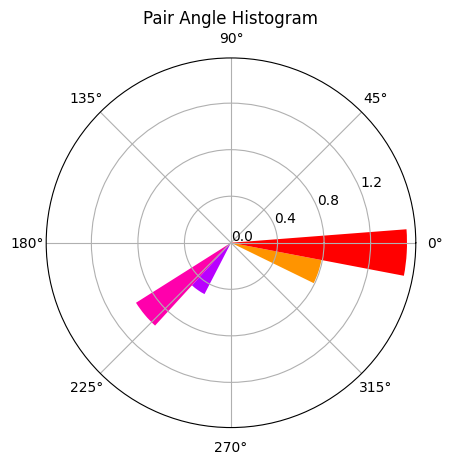

In [18]:

key = list(pair_dict.keys())[16]
plot_pairs = good_pairs2[good_pairs2[:, 0] == key]
plot_latency_angle_hist(sd, plot_pairs,  by_firing_rate=True, late_cutoff_high=latency_ms)



SD: 0.42331599894079075
Rotated SD: 0.42360115626443307
Pairs removed by SD cutoff: 0
Total Final Pairs: 1
Pairs removed by SD cutoff: 0
Total Final Pairs: 1


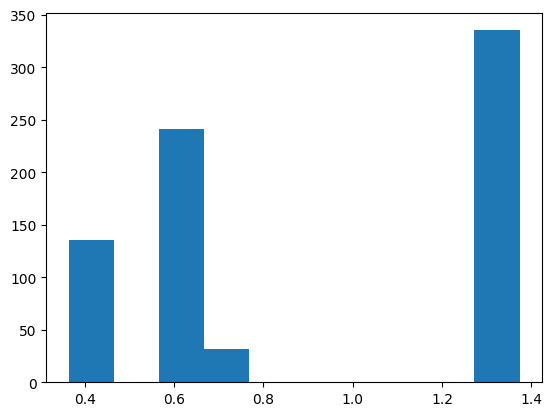

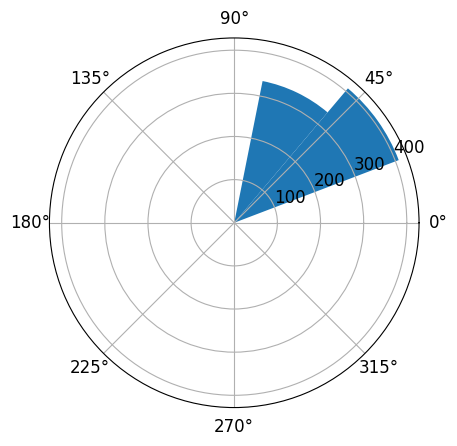

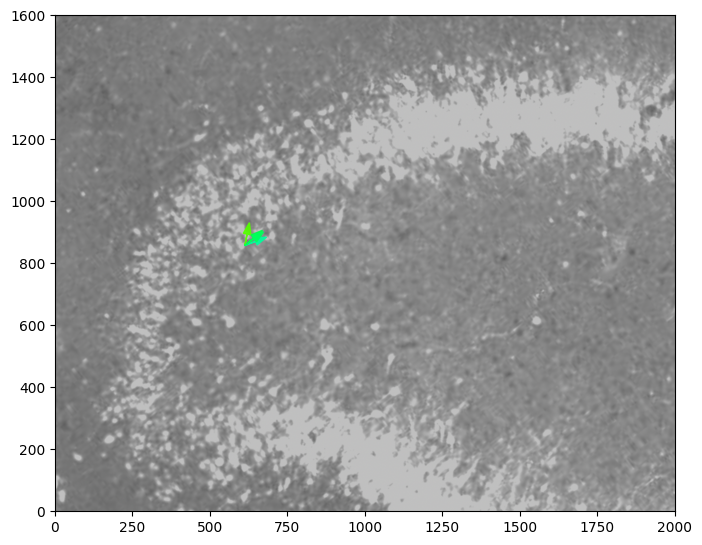

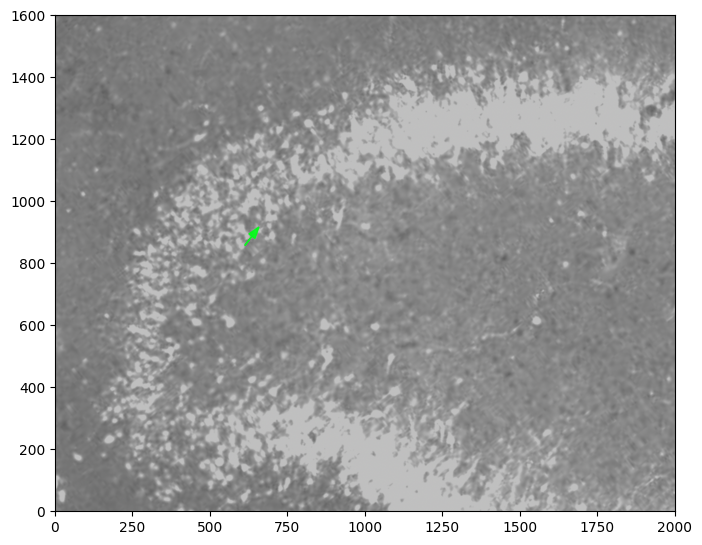

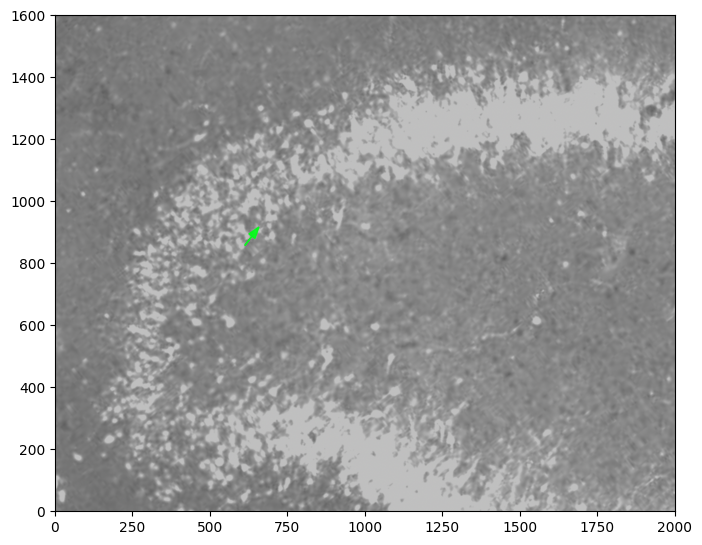

In [58]:
num=6

key = list(pair_dict.keys())[num]
print("SD:", np.std( pair_dict[key] ))
print("Rotated SD:", rotated_sd( pair_dict[key] ))

plt.hist( pair_dict[key] )

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.hist(pair_dict[key], bins=2,density=False)
ax.set_rgrids([100, 200, 300, 400])
# ax.grid(linewidth=.5)  # Set the gridline width to 2
ax.tick_params(labelsize=12)  # Set the font size of the labels to 8


plot_pairs = good_pairs2[good_pairs2[:, 0] == key]
plot_vector_layout1( sd, plot_pairs ,  image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png", xlim=(0,2000), ylim=(0,1600) )
# plot_vector_layout5( sd, plot_pairs ,  image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png", xlim=(0,2000), ylim=(0,1600),
#                     sd_cuttoff=.5 , latency_ms=30 )
plot_vector_layout5( sd, plot_pairs ,  image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png", xlim=(0,2000), ylim=(0,1600),
                sd_cuttoff=100 , latency_ms=30 )
plot_vector_layout5( sd, plot_pairs ,  image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png", xlim=(0,2000), ylim=(0,1600),
            sd_cuttoff=.5, latency_ms=30 )

In [ ]:


key = list(pair_dict.keys())[num]
print("SD:", np.std( pair_dict[key] ))
print("Rotated SD:", rotated_sd( pair_dict[key] ))

plt.hist( pair_dict[key] )

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.hist(pair_dict[key],density=False)
ax.grid(linewidth=.3)  # Set the gridline width to 2

# Customize the font size of the labels
ax.tick_params(labelsize=8)  #


plot_pairs = good_pairs2[good_pairs2[:, 0] == key]
plot_vector_layout1( sd, plot_pairs ,  image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png", xlim=(0,2000), ylim=(0,1600) )
# plot_vector_layout5( sd, plot_pairs ,  image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png", xlim=(0,2000), ylim=(0,1600),
#                     sd_cuttoff=.5 , latency_ms=30 )
plot_vector_layout5( sd, plot_pairs ,  image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png", xlim=(0,2000), ylim=(0,1600),
                sd_cuttoff=100 , latency_ms=30 )
plot_vector_layout5( sd, plot_pairs ,  image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png", xlim=(0,2000), ylim=(0,1600),
            sd_cuttoff=.5, latency_ms=30 )

In [55]:
@interact(num=(0,len(pair_dict)))
def angles_hist(num):
    key = list(pair_dict.keys())[num]
    print("SD:", np.std( pair_dict[key] ))
    print("Rotated SD:", rotated_sd( pair_dict[key] ))

    plt.hist( pair_dict[key] )

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='polar')
    ax.hist(pair_dict[key],density=False)
    ax.grid(linewidth=.3)  # Set the gridline width to 2

    # Customize the font size of the labels
    ax.tick_params(labelsize=8)  #


    plot_pairs = good_pairs2[good_pairs2[:, 0] == key]
    plot_vector_layout1( sd, plot_pairs ,  image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png", xlim=(0,2000), ylim=(0,1600) )
    # plot_vector_layout5( sd, plot_pairs ,  image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png", xlim=(0,2000), ylim=(0,1600),
    #                     sd_cuttoff=.5 , latency_ms=30 )
    plot_vector_layout5( sd, plot_pairs ,  image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png", xlim=(0,2000), ylim=(0,1600),
                    sd_cuttoff=100 , latency_ms=30 )
    plot_vector_layout5( sd, plot_pairs ,  image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png", xlim=(0,2000), ylim=(0,1600),
                sd_cuttoff=.5, latency_ms=30 )
    

interactive(children=(IntSlider(value=96, description='num', max=192), Output()), _dom_classes=('widget-intera…

In [41]:
10

10

In [ ]:
65

In [ ]:
16